<p style="color:#FFF; background:#06D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Version 2025-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC–BY–NC–ND</span>
<span style="font-size:40px; font-style:normal"><b>PACKAGE : NUMPY</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick ಄ u<b>-</b>bordeaux • fr</p>

Le package [**numpy**](https://numpy.org) (contraction de ***Numerical Python***) fournit au langage Python un nouveau conteneur ordonné, appelé **`array`**, qui permet de stocker, de manière flexible et efficace, des ***matrices multi-dimensionnelles de données homogènes***. Le terme "**array**" peut se traduire en français de plusieurs manières : *panoplie, palette, éventail, gamme, collection, table*, mais aucun de ces termes n'inclut la notion de multi-dimensionalité présente dans la nature du conteneur. La traduction la plus proche serait **table**, mais ce terme a une sémantique très forte dans la terminologie utilisée pour les bases de données, et risque donc d'engendrer une confusion dans les applications liées aux Sciences des Données. Au final, la traduction par **matrice multi-dimensionnelle** ou **matrice nD** semble la plus cohérente, et c'est celle qui sera utilisée dans ce cours. Pour les matrices de dimension 1, on pourra également employer le terme usuel de **vecteur**.

Le terme "**données homogènes**" signifie que tous les éléments stockés dans un conteneur **`array`** doivent être du même type, ce qui implique que chaque élément occupe exactement le même espace dans la mémoire de l'ordinateur. Par conséquent, en stockant les éléments de manière juxtaposée en mémoire, il est possible d'accéder de manière très efficace à chacun d'eux, par simple décalage par rapport à l'adresse de base de la matrice. A l'inverse, le conteneur **`list`** disponible dans le noyau du langage Python, est une structure destinée à stocker des ***données hétérogènes*** (chaque élément d'une liste peut avoir son type propre) ce qui interdit un stockage compact et un accès efficace aux données individuelles.

Comme pour les autres chapitres, ce notebook a pour objet de faire un tour d'horizon rapide et de montrer les fonctionnalités les plus intéressanes de **numpy** pour une utilisation dans le domaine des Sciences des Données. Pour avoir des informations complémentaires, on peut se référer à la documentation complète du package qui se trouve sur le site officiel [**numpy.org**](https://numpy.org/doc/stable), sachant qu'une copie locale est directement disponible dans le menu **`Help`** de JupyterLab, sous le titre ***NumPy Reference***.

In [1]:
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur
from SRC.tools import show, inspect # import des fonctions utilitaires du module 'tools'

---
On importe habituellement le package **numpy** par le biais d'un alias court, avec la commande suivante :

> **`import numpy as np`**

In [2]:
import numpy as np # import du package 'numpy' avec l'alias habituel 'np'

En relation avec ce nouveau type de conteneur, le package **`numpy`** fournit une boîte à outils extrêmement riche, contenant plus de 500 fonctions destinées à créer et manipuler des données structurées de type **`array`**. Leur liste complète peut s'obtenir à l'aide de la fonction **`inspect`** vue dans le chapitre 3 :

In [3]:
inspect(np, detail=0) # augmenter la valeur de 'detail' pour avoir plus d'informations

● NAME = numpy / TYPE = module
● ROLE = NumPy

● MODULES : use 'inspect(numpy.xxx)' to get additional info for each inner module
char        core        ctypeslib   dtypes      emath       exceptions  f2py        fft         
lib         linalg      ma          polynomial  random      rec         strings     testing     
typing      

● TYPES : use 'inspect(numpy.xxx)' to get additional info for each inner type
bool             bool_            broadcast        busdaycalendar   byte             
bytes_           cdouble          character        clongdouble      complex128       
complex64        complexfloating  csingle          datetime64       double           
dtype            errstate         finfo            flatiter         flexible         
float16          float32          float64          floating         generic          
half             iinfo            inexact          int16            int32            
int64            int8             int_             intc             i

<h2 style="padding:16px; color:#FFF; background:#06D">A - Création de matrices</h2>

### 1 - Création de matrices à partir de listes Python

In [4]:
# création d'une matrice 1D (= vecteur) à partir d'une liste Python
a = np.array([1,-2,3,-4,-5,6,-7,8])

In [5]:
a # affichage par défaut (le préfixe 'array' indique une matrice numpy)

array([ 1, -2,  3, -4, -5,  6, -7,  8])

In [6]:
print(a) # affichage plus compact et plus lisible

[ 1 -2  3 -4 -5  6 -7  8]


In [7]:
show("a") # idem avec la fonction 'show'

a ➤ [ 1 -2  3 -4 -5  6 -7  8]


En plus des données brutes stockées dans la matrice, le type **`array`** possède un certain nombre de propriétés, accessibles par la notation pointée :

- **`.ndim`** = nombre de dimensions de la matrice
- **`.shape`** = nombre d'éléments pour chacune des dimensions
- **`.size`** = nombre total d'éléments de la matrice
- **`.itemsize`** = nombre d'octets par élément
- **`.nbytes`** = nombre d'octets pour la matrice
- **`.dtype`** = type de donnée des éléments de la matrice (selon la nomenclature **numpy**)

La liste des types de données utilisables avec numpy se trouve sur **[cette page](https://numpy.org/doc/stable/reference/arrays.dtypes.html)** du manuel de référence.

In [8]:
show("a; a.ndim; a.shape; a.size; a.itemsize; a.nbytes; a.dtype") # propriétés de la matrice

a ➤ [ 1 -2  3 -4 -5  6 -7  8]
a.ndim ➤ 1
a.shape ➤ (8,)
a.size ➤ 8
a.itemsize ➤ 8
a.nbytes ➤ 64
a.dtype ➤ int64


In [9]:
# création d'une matrice 1D en forçant le type des éléments
b = np.array([1,-2,3,-4,-5,6,-7,8], dtype=float) # on peut utiliser un type standard
show("b; b.ndim; b.shape; b.size; b.itemsize; b.nbytes; b.dtype;")
c = np.array([1,-2,3,-4,-5,6,-7,8], dtype=np.float32) # ou un type spécifique numpy
show("c; c.ndim; c.shape; c.size; c.itemsize; c.nbytes; c.dtype;")
d = np.array([1,-2,3,-4,-5,6,-7,8], dtype='i2') # ou une chaîne avec la notation courte
show("d; d.ndim; d.shape; d.size; d.itemsize; d.nbytes; d.dtype")

b ➤ [ 1. -2.  3. -4. -5.  6. -7.  8.]
b.ndim ➤ 1
b.shape ➤ (8,)
b.size ➤ 8
b.itemsize ➤ 8
b.nbytes ➤ 64
b.dtype ➤ float64

c ➤ [ 1. -2.  3. -4. -5.  6. -7.  8.]
c.ndim ➤ 1
c.shape ➤ (8,)
c.size ➤ 8
c.itemsize ➤ 4
c.nbytes ➤ 32
c.dtype ➤ float32

d ➤ [ 1 -2  3 -4 -5  6 -7  8]
d.ndim ➤ 1
d.shape ➤ (8,)
d.size ➤ 8
d.itemsize ➤ 2
d.nbytes ➤ 16
d.dtype ➤ int16


In [10]:
# création d'une matrice 2D à partir d'une liste de listes
a = np.array([[1,-2,3,-4], [-5,6,-7,8]])
show("a#; a.ndim; a.shape; a.size; a.itemsize; a.nbytes; a.dtype")

a ➤
[[ 1 -2  3 -4]
 [-5  6 -7  8]]
a.ndim ➤ 2
a.shape ➤ (2, 4)
a.size ➤ 8
a.itemsize ➤ 8
a.nbytes ➤ 64
a.dtype ➤ int64


In [11]:
# création d'une matrice 2D en forçant le type des éléments
b = np.array([[1,-2,3,-4], [-5,6,-7,8]], dtype=str) # on peut utiliser le type standard 'str'
# dans ce cas, la taille commune aux éléments de la matrice est calculée automatiquement
show("b#; b.ndim; b.shape; b.size; b.itemsize; b.nbytes; b.dtype;")
c = np.array([[1,-2,3,-4], [-5,6,-7,8]], dtype='U6') # on peut utiliser le type 'U' (unicode)
# dans ce cas, on définit explicitement une taille fixe pour les éléments de la matrice
show("c#; c.ndim; c.shape; c.size; c.itemsize; c.nbytes; c.dtype")

b ➤
[['1' '-2' '3' '-4']
 ['-5' '6' '-7' '8']]
b.ndim ➤ 2
b.shape ➤ (2, 4)
b.size ➤ 8
b.itemsize ➤ 8
b.nbytes ➤ 64
b.dtype ➤ <U2

c ➤
[['1' '-2' '3' '-4']
 ['-5' '6' '-7' '8']]
c.ndim ➤ 2
c.shape ➤ (2, 4)
c.size ➤ 8
c.itemsize ➤ 24
c.nbytes ➤ 192
c.dtype ➤ <U6


---
### 2 - Création de matrices à l'aide de fonctions génératrices

In [12]:
print(np.zeros((3,5))) # création d'une matrice initialisée à 0 (type 'float' par défaut)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [13]:
print(np.zeros((3,5), dtype=int)) # idem en forçant le type à 'int'

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [14]:
print(np.zeros_like(a)) # création d'une matrice de 0 à partir d'une matrice existante

[[0 0 0 0]
 [0 0 0 0]]


In [15]:
print(np.ones((2,3,6))) # création d'une matrice initialisée à 1

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]]]


In [16]:
print(np.ones_like(a)) # création d'une matrice de 1 à partir d'une matrice existante

[[1 1 1 1]
 [1 1 1 1]]


In [17]:
print(np.full((3,2,12), 'x')) # création d'une matrice initialisée à une valeur donnée

[[['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']
  ['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']]

 [['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']
  ['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']]

 [['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']
  ['x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x' 'x']]]


In [18]:
print(np.full_like(a, 999)) # création d'une matrice initialisée à partir d'une matrice existante

[[999 999 999 999]
 [999 999 999 999]]


---

In [19]:
print(np.eye(3)) # création d'une matrice identité de taille 3

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
print(np.tri(5)) # création d'une matrice triangulaire sur base carrée

[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]]


In [21]:
print(np.tri(4,8)) # création d'une matrice triangulaire sur base rectangulaire

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]]


In [22]:
print(np.tri(6,9,2)) # création d'une matrice triangulaire avec décalage de diagonale

[[1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0.]]


In [23]:
rows, cols = np.indices((5,6)) # création des matrices d'indices (lignes et colonnes)
show('rows#;cols#')

rows ➤
[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]]
cols ➤
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]


In [24]:
print(np.arange(99,0,-11)) # création d'une matrice à partir d'un itérateur à pas entiers

[99 88 77 66 55 44 33 22 11]


In [25]:
print(np.linspace(0,1,11)) # idem avec un itérateur à pas linéaires

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [26]:
print(np.logspace(-4,4,9)) # idem avec un itérateur à pas logarithmiques

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


In [27]:
# création d'une matrice de valeurs aléatoires entières sur {1..6}
print(np.random.randint(1, 7, (4,32))) # intervalle de valeurs, fermé à gauche, ouvert à droite

[[2 6 6 6 1 4 6 6 5 2 3 2 5 4 3 5 4 4 3 4 5 1 1 5 5 6 2 6 1 4 6 2]
 [4 3 2 1 4 3 4 6 4 6 5 2 4 4 4 2 3 4 4 6 4 6 1 4 4 1 4 5 4 4 2 1]
 [3 1 5 6 5 3 6 2 4 6 3 6 6 5 6 2 3 3 6 6 1 5 3 1 2 1 1 5 3 6 3 6]
 [3 4 6 2 2 6 6 3 2 6 6 3 6 1 2 5 3 6 6 3 1 2 5 6 5 2 5 5 1 5 6 6]]


In [28]:
# création d'une matrice obtenue par tirage aléatoire dans un ensemble
print(np.random.choice(list('ABC'), (6,16), p=(0.6,0.3,0.1))) # p = probas

[['B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'C' 'A' 'A']
 ['C' 'A' 'C' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'C' 'A' 'C' 'C' 'A']
 ['A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B']
 ['B' 'B' 'A' 'A' 'A' 'C' 'B' 'C' 'C' 'A' 'B' 'A' 'B' 'B' 'A' 'B']
 ['A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A']
 ['B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'B' 'A' 'C' 'A' 'B' 'A']]


In [29]:
# création d'une matrice obtenue par tirage multinomial avec probabilités prédéfinies
print(np.random.multinomial(100, (0.6,0.3,0.1), size=8)) # size = nb de simulations

[[64 24 12]
 [53 33 14]
 [59 34  7]
 [62 28 10]
 [70 16 14]
 [66 28  6]
 [57 32 11]
 [48 42 10]]


In [30]:
# création d'une matrice de valeurs aléatoires réelles, distribution uniforme sur [0,1)
print(np.random.rand(4,6))

[[0.57946635 0.73111115 0.25937116 0.65692401 0.21370835 0.8039301 ]
 [0.18151509 0.08858795 0.5121356  0.18870233 0.84907908 0.39637962]
 [0.50687337 0.41060649 0.66943696 0.89443635 0.01194159 0.09645226]
 [0.78720298 0.15986639 0.09101237 0.72957642 0.96965241 0.39096045]]


In [31]:
# idem avec distribution normale (avec moyenne = 0 et écart-type = 1)
print(np.random.normal(0, 1, (4,6)))

[[-1.73850007 -1.32188786 -1.18292824 -0.02731192  1.04767134  1.49104502]
 [-0.21432842 -0.08807563  0.19147601  0.22716047  0.54546173 -0.786586  ]
 [-1.48711531 -1.58849235  1.97518648 -0.05923418 -0.07549952 -1.22512804]
 [ 0.33943968  0.45898684 -0.29268627 -0.63135145 -0.25398027 -0.15560424]]


<h2 style="padding:16px; color:#FFF; background:#06D">B - Transformation de matrices</h2>

### 1 - Modification de forme ou de dimension

In [32]:
a = np.array([[1,-2,3,-4], [-5,6,-7,8], [9, -10, 11, -12]]) # création d'une matrice de test
print(a)

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [33]:
print(a.T) # transposition de la matrice (= inversion de l'ordre des dimensions)

[[  1  -5   9]
 [ -2   6 -10]
 [  3  -7  11]
 [ -4   8 -12]]


In [34]:
print(a.ravel()) # aplatissement de la matrice (= conversion en vecteur)

[  1  -2   3  -4  -5   6  -7   8   9 -10  11 -12]


In [35]:
print(a.T.ravel()) # idem avec inversion de l'ordre des dimensions

[  1  -5   9  -2   6 -10   3  -7  11  -4   8 -12]


In [36]:
print(a.reshape((1,12))) # modification de la forme d'une matrice (1 ligne, 12 colonnes)

[[  1  -2   3  -4  -5   6  -7   8   9 -10  11 -12]]


In [37]:
print(a.reshape((12,1))) # idem (12 lignes, 1 colonne)

[[  1]
 [ -2]
 [  3]
 [ -4]
 [ -5]
 [  6]
 [ -7]
 [  8]
 [  9]
 [-10]
 [ 11]
 [-12]]


In [38]:
print(a.reshape((2,6))) # idem (2 lignes, 6 colonnes)

[[  1  -2   3  -4  -5   6]
 [ -7   8   9 -10  11 -12]]


In [39]:
print(a.reshape((2,2,3))) # idem (2 plans, 2 lignes, 3 colonnes)

[[[  1  -2   3]
  [ -4  -5   6]]

 [[ -7   8   9]
  [-10  11 -12]]]


In [40]:
# si on met -1 pour une dimension, sa taille sera calculée automatiquement
print(a.reshape((2,-1,2))) # idem (2 plans, 3 lignes, 2 colonnes)

[[[  1  -2]
  [  3  -4]
  [ -5   6]]

 [[ -7   8]
  [  9 -10]
  [ 11 -12]]]


In [41]:
print(a.reshape(-1)) # equivalent à ravel()

[  1  -2   3  -4  -5   6  -7   8   9 -10  11 -12]


In [42]:
print(a.repeat(2,axis=0)) # répétition des lignes

[[  1  -2   3  -4]
 [  1  -2   3  -4]
 [ -5   6  -7   8]
 [ -5   6  -7   8]
 [  9 -10  11 -12]
 [  9 -10  11 -12]]


In [43]:
print(a.repeat(4,axis=1)) # répétition des colonnes

[[  1   1   1   1  -2  -2  -2  -2   3   3   3   3  -4  -4  -4  -4]
 [ -5  -5  -5  -5   6   6   6   6  -7  -7  -7  -7   8   8   8   8]
 [  9   9   9   9 -10 -10 -10 -10  11  11  11  11 -12 -12 -12 -12]]


In [44]:
print(a.repeat(3)) # répétition avec applatissement

[  1   1   1  -2  -2  -2   3   3   3  -4  -4  -4  -5  -5  -5   6   6   6
  -7  -7  -7   8   8   8   9   9   9 -10 -10 -10  11  11  11 -12 -12 -12]


In [45]:
print(a.T.repeat(3)) # idem avec inversion de l'ordre des dimensions

[  1   1   1  -5  -5  -5   9   9   9  -2  -2  -2   6   6   6 -10 -10 -10
   3   3   3  -7  -7  -7  11  11  11  -4  -4  -4   8   8   8 -12 -12 -12]


In [46]:
print(a[None, :, :]) # ajout d'une dimension en tête
# a[None, ...] # version alternative : '...' représente toutes les dimensions restantes

[[[  1  -2   3  -4]
  [ -5   6  -7   8]
  [  9 -10  11 -12]]]


In [47]:
print(a[:, None, :]) # ajout d'une dimension au centre

[[[  1  -2   3  -4]]

 [[ -5   6  -7   8]]

 [[  9 -10  11 -12]]]


In [48]:
print(a[:, :, None]) # ajout d'une dimension en queue
# a[..., None]) # version alternative : '...' représente toutes les dimensions restantes

[[[  1]
  [ -2]
  [  3]
  [ -4]]

 [[ -5]
  [  6]
  [ -7]
  [  8]]

 [[  9]
  [-10]
  [ 11]
  [-12]]]


---
### 2 - Transformations particulières pour matrice 2D

In [49]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [50]:
print(np.fliplr(a)) # transposition left <-> right

[[ -4   3  -2   1]
 [  8  -7   6  -5]
 [-12  11 -10   9]]


In [51]:
print(np.flipud(a)) # transposition up <-> down

[[  9 -10  11 -12]
 [ -5   6  -7   8]
 [  1  -2   3  -4]]


In [52]:
print(np.rot90(a)) # rotation 90° (sens trigonométrique)

[[ -4   8 -12]
 [  3  -7  11]
 [ -2   6 -10]
 [  1  -5   9]]


In [53]:
print(np.rot90(a,2)) # rotation 180°

[[-12  11 -10   9]
 [  8  -7   6  -5]
 [ -4   3  -2   1]]


In [54]:
print(np.rot90(a,3)) # rotation 270°

[[  9  -5   1]
 [-10   6  -2]
 [ 11  -7   3]
 [-12   8  -4]]


---
### 3 - Répétition, assemblage et découpage de matrices

In [55]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [56]:
print(np.tile(a,[2,3])) # répétition de la matrice (2x en vertical, 3x en horizontal)

[[  1  -2   3  -4   1  -2   3  -4   1  -2   3  -4]
 [ -5   6  -7   8  -5   6  -7   8  -5   6  -7   8]
 [  9 -10  11 -12   9 -10  11 -12   9 -10  11 -12]
 [  1  -2   3  -4   1  -2   3  -4   1  -2   3  -4]
 [ -5   6  -7   8  -5   6  -7   8  -5   6  -7   8]
 [  9 -10  11 -12   9 -10  11 -12   9 -10  11 -12]]


In [69]:
print(np.vstack([a,-a,a])) # assemblage verticale (= en hauteur)
#print(np.r_[a,-a,a]) # version alternative plus compacte
#print(np.concatenate([a,-a,a], axis=0)) # autre version alternative plus générale

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]
 [ -1   2  -3   4]
 [  5  -6   7  -8]
 [ -9  10 -11  12]
 [  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [72]:
print(np.hstack([a,-a,a])) # assemblage horizontale (= en largeur)
#print(np.c_[a,-a,a]) # version alternative plus compacte (c = column stack)
#print(np.concatenate([a,-a,a], axis=1)) # autre version alternative plus générale

[[  1  -2   3  -4  -1   2  -3   4   1  -2   3  -4]
 [ -5   6  -7   8   5  -6   7  -8  -5   6  -7   8]
 [  9 -10  11 -12  -9  10 -11  12   9 -10  11 -12]]


In [76]:
print(np.stack([a,-a,a])) # assemblage sur un nouvel axe (= en profondeur)

[[[  1  -2   3  -4]
  [ -5   6  -7   8]
  [  9 -10  11 -12]]

 [[ -1   2  -3   4]
  [  5  -6   7  -8]
  [ -9  10 -11  12]]

 [[  1  -2   3  -4]
  [ -5   6  -7   8]
  [  9 -10  11 -12]]]


In [77]:
print(np.dstack([a,-a,a]).T) # assemblage par position d'élément

[[[  1  -5   9]
  [ -2   6 -10]
  [  3  -7  11]
  [ -4   8 -12]]

 [[ -1   5  -9]
  [  2  -6  10]
  [ -3   7 -11]
  [  4  -8  12]]

 [[  1  -5   9]
  [ -2   6 -10]
  [  3  -7  11]
  [ -4   8 -12]]]


In [61]:
b = np.vstack([a,-a]); c, d, e = np.vsplit(b, 3) # découpage vertical (en parties équitables)
show("b#; c#; d#; e#")

b ➤
[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]
 [ -1   2  -3   4]
 [  5  -6   7  -8]
 [ -9  10 -11  12]]
c ➤
[[ 1 -2  3 -4]
 [-5  6 -7  8]]
d ➤
[[  9 -10  11 -12]
 [ -1   2  -3   4]]
e ➤
[[  5  -6   7  -8]
 [ -9  10 -11  12]]


In [62]:
b = np.hstack([a,-a,a]); c, d, e = np.hsplit(b, [3,10]) # découpage horizontal (en parties ajustables)
show("b#; c#; d#; e#")

b ➤
[[  1  -2   3  -4  -1   2  -3   4   1  -2   3  -4]
 [ -5   6  -7   8   5  -6   7  -8  -5   6  -7   8]
 [  9 -10  11 -12  -9  10 -11  12   9 -10  11 -12]]
c ➤
[[  1  -2   3]
 [ -5   6  -7]
 [  9 -10  11]]
d ➤
[[ -4  -1   2  -3   4   1  -2]
 [  8   5  -6   7  -8  -5   6]
 [-12  -9  10 -11  12   9 -10]]
e ➤
[[  3  -4]
 [ -7   8]
 [ 11 -12]]


<h2 style="padding:16px; color:#FFF; background:#06D">C - Accès aux éléments d'une matrice</h2>

### 1 - Accès aux éléments par indices, par tranches et par énumérations

In [63]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [64]:
show("a[0,0]; a[0,-1]; a[2,2]; a[-1,-1];; a[0,(3,1,2,0)]; a[5*(0,1,2),-1]; a[(0,1,1,2),(3,1,2,0)];")
show("a[1,:]; a[:,-1];; a[:,(3,1,2,0)]#;; a[(0,1,1,2),:]#;; a[1:3,1:-1]#;; a[::-1,::-1]#")

a[0,0] ➤ 1
a[0,-1] ➤ -4
a[2,2] ➤ 11
a[-1,-1] ➤ -12

a[0,(3,1,2,0)] ➤ [-4 -2  3  1]
a[5*(0,1,2),-1] ➤ [ -4   8 -12  -4   8 -12  -4   8 -12  -4   8 -12  -4   8 -12]
a[(0,1,1,2),(3,1,2,0)] ➤ [-4  6 -7  9]

a[1,:] ➤ [-5  6 -7  8]
a[:,-1] ➤ [ -4   8 -12]

a[:,(3,1,2,0)] ➤
[[ -4  -2   3   1]
 [  8   6  -7  -5]
 [-12 -10  11   9]]

a[(0,1,1,2),:] ➤
[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]

a[1:3,1:-1] ➤
[[  6  -7]
 [-10  11]]

a[::-1,::-1] ➤
[[-12  11 -10   9]
 [  8  -7   6  -5]
 [ -4   3  -2   1]]


---
### 2 - Accès aux éléments par prédicats et méthodes

In [65]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [66]:
show("a[a > 0]; a[abs(a) > 5]; a[(a > 0) & (a < 7)]; a[(a%2 == 0) | (a%3 == 0)]")

a[a > 0] ➤ [ 1  3  6  8  9 11]
a[abs(a) > 5] ➤ [  6  -7   8   9 -10  11 -12]
a[(a > 0) & (a < 7)] ➤ [1 3 6]
a[(a%2 == 0) | (a%3 == 0)] ➤ [ -2   3  -4   6   8   9 -10 -12]


In [67]:
b, c = a.copy(), a.copy() # création de deux copies de la matrice 'a'
b[b < 0] = 0 # mettre à 0 tous les éléments strictement négatifs
c[c % 2 != 0] *= 2 # multiplier par 2 tous les éléments impairs
show("b#;; c#")

b ➤
[[ 1  0  3  0]
 [ 0  6  0  8]
 [ 9  0 11  0]]

c ➤
[[  2  -2   6  -4]
 [-10   6 -14   8]
 [ 18 -10  22 -12]]


In [68]:
show("np.where(a < 0, 0, a)#;; np.where(a % 2 != 0, 2*a, a)#") # idem avec création à la volée

np.where(a < 0, 0, a) ➤
[[ 1  0  3  0]
 [ 0  6  0  8]
 [ 9  0 11  0]]

np.where(a % 2 != 0, 2*a, a) ➤
[[  2  -2   6  -4]
 [-10   6 -14   8]
 [ 18 -10  22 -12]]


---
### 3 - Itération sur les éléments

In [69]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [70]:
for value in a: # iteration sur l'axe majeur (= lignes pour matrice 2D)
  print(f"value = {value}")

value = [ 1 -2  3 -4]
value = [-5  6 -7  8]
value = [  9 -10  11 -12]


In [71]:
for value in a.T: # iteration sur l'axe mineur (= colonnes pour matrice 2D)
  print(f"value = {value}")

value = [ 1 -5  9]
value = [ -2   6 -10]
value = [ 3 -7 11]
value = [ -4   8 -12]


In [72]:
for value in a.flat: # iteration avec aplatissement de la matrice
  print(f"value = {value}")
# on peut également itérer sur a.T.flat pour un parcours par colonnes

value = 1
value = -2
value = 3
value = -4
value = -5
value = 6
value = -7
value = 8
value = 9
value = -10
value = 11
value = -12


In [73]:
for index, value in enumerate(a.flat): # iteration avec index 1D
  print(f"index = {index} ● value = {value}") # access with a.flat[index]

index = 0 ● value = 1
index = 1 ● value = -2
index = 2 ● value = 3
index = 3 ● value = -4
index = 4 ● value = -5
index = 5 ● value = 6
index = 6 ● value = -7
index = 7 ● value = 8
index = 8 ● value = 9
index = 9 ● value = -10
index = 10 ● value = 11
index = 11 ● value = -12


In [74]:
for index, value in np.ndenumerate(a): # iteration avec index nD
  print(f"index = {index} ● value = {value}") # access with a[index]

index = (0, 0) ● value = 1
index = (0, 1) ● value = -2
index = (0, 2) ● value = 3
index = (0, 3) ● value = -4
index = (1, 0) ● value = -5
index = (1, 1) ● value = 6
index = (1, 2) ● value = -7
index = (1, 3) ● value = 8
index = (2, 0) ● value = 9
index = (2, 1) ● value = -10
index = (2, 2) ● value = 11
index = (2, 3) ● value = -12


<h2 style="padding:16px; color:#FFF; background:#06D">D - Opérations sur les matrices</h2>

### 1 - Manipulation par opérateurs

Les opérateurs arithmétiques standards **`+  -  *  /  //  %  ** `** sont utilisables sur les matrices multidimensionnelles de type **`array`**. Ces opérateurs s'appliquent toujours ***élément par élément***, sur les deux matrices utilisées comme opérandes. A ces opérateurs standards, s'ajoute également l'opérateur **`@`** qui permet d'effectuer un ***produit matriciel*** entre deux matrices compatibles.

Lors de l'application de l'opérateur, l'interpréteur va vérifier le paramètre **`shape`** (nombre d'éléments dans chaque dimension) des deux matrices pour savoir si l'opération choisie est possible. Si les valeurs de **`shape`** sont identiques pour les deux matrices, l'opérations va s'effectuer élément par élément, sans difficulté. Si les valeurs de **`shape`** sont différentes, mais que pour chaque dimension, le nombre d'éléments est soit le même pour les deux matrices, soit égal à 0 ou 1 pour l'une des matrices, l'opération est également possible grâce au principe du ***broadcasting*** mis en oeuvre par **`numpy`**. Cela consiste à répéter les données automatiquement les données existantes pour obtenir autant d'éléments sur chaque dimension que l'autre opérande. Le principe du broadcasting est assez intuitif, mais des explications détaillées sont disponibles sur [**cette page**](https://numpy.org/doc/stable/user/basics.broadcasting.html) du manuel d'utilisation de **`numpy`**.

In [75]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [76]:
show("a + a#;; a * a#;; a % 4#;; a ** 4#;; 4 - 3*a + 2*a*a#") # opérateurs avec ou sans broadcasting

a + a ➤
[[  2  -4   6  -8]
 [-10  12 -14  16]
 [ 18 -20  22 -24]]

a * a ➤
[[  1   4   9  16]
 [ 25  36  49  64]
 [ 81 100 121 144]]

a % 4 ➤
[[1 2 3 0]
 [3 2 1 0]
 [1 2 3 0]]

a ** 4 ➤
[[    1    16    81   256]
 [  625  1296  2401  4096]
 [ 6561 10000 14641 20736]]

4 - 3*a + 2*a*a ➤
[[  3  18  13  48]
 [ 69  58 123 108]
 [139 234 213 328]]


In [77]:
show("a @ a.T#;; a.T @ a#") # produit matriciel

a @ a.T ➤
[[  30  -70  110]
 [ -70  174 -278]
 [ 110 -278  446]]

a.T @ a ➤
[[ 107 -122  137 -152]
 [-122  140 -158  176]
 [ 137 -158  179 -200]
 [-152  176 -200  224]]


---
Chacun des opérateurs arithmétiques **`+  -  *  /  //  %  **  @`** possède son équivalent sous forme de fonction : **`np.add, np.subtract, np.multiply, np.divide, np.floor_divide, np.mod, np.power, np.matmul`** . L'intérêt principal d'avoir cette double syntaxe est de pouvoir utiliser les opérateurs en tant que paramètre d'une fonction (ce qui peut s'avérer utile de temps en temps) mais également d'utiliser des paramètres optionnels permettant d'obtenir des modes supplémentaires pour les calculs. Par exemple, on peut utiliser le mode **`outer`** (mode externe, plus communément appelé, ***mode cartésien***) pour les opérations sur les vecteurs et les matrices, au lieu du mode **`inner`** (mode interne, autrement dit, ***élément par élément***) mis en oeuvre par défaut :

In [78]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [79]:
show("np.add(a, a)#;; np.mod(a, 4)#;; np.matmul(a, a.T)#")

np.add(a, a) ➤
[[  2  -4   6  -8]
 [-10  12 -14  16]
 [ 18 -20  22 -24]]

np.mod(a, 4) ➤
[[1 2 3 0]
 [3 2 1 0]
 [1 2 3 0]]

np.matmul(a, a.T) ➤
[[  30  -70  110]
 [ -70  174 -278]
 [ 110 -278  446]]


In [80]:
z = np.arange(11) # création d'un vecteur de test
show("z;; np.add.outer(z, z)#;; np.multiply.outer(z, z)#") # utilisation du mode cartésien
# Note : np.outer(...) est un raccourci de np.multiply.outer(...)

z ➤ [ 0  1  2  3  4  5  6  7  8  9 10]

np.add.outer(z, z) ➤
[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10 11]
 [ 2  3  4  5  6  7  8  9 10 11 12]
 [ 3  4  5  6  7  8  9 10 11 12 13]
 [ 4  5  6  7  8  9 10 11 12 13 14]
 [ 5  6  7  8  9 10 11 12 13 14 15]
 [ 6  7  8  9 10 11 12 13 14 15 16]
 [ 7  8  9 10 11 12 13 14 15 16 17]
 [ 8  9 10 11 12 13 14 15 16 17 18]
 [ 9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20]]

np.multiply.outer(z, z) ➤
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   3   4   5   6   7   8   9  10]
 [  0   2   4   6   8  10  12  14  16  18  20]
 [  0   3   6   9  12  15  18  21  24  27  30]
 [  0   4   8  12  16  20  24  28  32  36  40]
 [  0   5  10  15  20  25  30  35  40  45  50]
 [  0   6  12  18  24  30  36  42  48  54  60]
 [  0   7  14  21  28  35  42  49  56  63  70]
 [  0   8  16  24  32  40  48  56  64  72  80]
 [  0   9  18  27  36  45  54  63  72  81  90]
 [  0  10  20  30  40  50  60  70  80  90 100

---
Les opérateurs de comparaison **`==  !=  >  >=  <  <=`** peuvent également être utilisées sur les données de type **`array`** et renvoient une matrice de booléens, en effectuant la comparaison élément par élément. Comme pour les opérateurs arithmétiques, chaque opérateur de comparaison possède son équivalent sous forme de fonction : **`np.equal, np.not_equal, np.greater, np.greater_equal, np.less, np.less_equal`**. Les expressions booléennes résultant des comparaisons peuvent se combiner avec les opérateurs booléens classiques **`!  &  |  ^`**, qui eux-même possèdent leur équivalent fonctionnel : **`np.logical_not, np.logical_or, np.logical_and, np.logical_xor`** :

In [81]:
show("a > 0#;; np.less_equal(a, 0)#;")
show("(a <= -8) | (a >= 2)#;; np.logical_and(np.greater(a,-8), np.less(a,2))#;")
show("np.less.outer(a.flat, z)#")

a > 0 ➤
[[ True False  True False]
 [False  True False  True]
 [ True False  True False]]

np.less_equal(a, 0) ➤
[[False  True False  True]
 [ True False  True False]
 [False  True False  True]]

(a <= -8) | (a >= 2) ➤
[[False False  True False]
 [False  True False  True]
 [ True  True  True  True]]

np.logical_and(np.greater(a,-8), np.less(a,2)) ➤
[[ True  True False  True]
 [ True False  True False]
 [False False False False]]

np.less.outer(a.flat, z) ➤
[[False False  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False False False False False 

---
### 2 - Manipulation par fonctions universelles

En plus du conteneur **`array`** particulièrement flexible et efficace, l'autre apport majeur du package **`numpy`** consiste en une nouvelle famille de fonctions **`ufunc`**, appelées ***fonctions universelles***. La propriété commune de ces fonctions est qu'elles peuvent s'appliquer directement à des vecteurs ou des matrices multi-dimensionnelles, et qu'elles vont automatiquement générer une boucle permettant d'appliquer la fonction, élément par élément, sur l'ensemble de la structure. Ce processus, appelé **vectorisation**, permet non seulement d'écrire un code plus compact (proche de la notation algébrique utilisée en mathématiques) mais surtout beaucoup plus rapide qu'un code en Python pur (entre 20x et 30x plus rapide, en moyenne).

Parmi les fonctions universelles fournies par **`numpy`**, on trouve notament les versions universelles des fonctions mathématiques figurant dans le module **`math`** standard de Python :

**`abs`** ● **`sign`** ● **`floor`** ● **`ceil`** ● **`round`** ● **`deg2rad`** ● **`rad2deg`** ● **`real`** ● **`imag`** ● **`hypot`** ● **`angle`** ● **`sqrt`** ● **`exp`** ● **`log`** ● **`log2`** ● **`log10`** ● **`cos`** ● **`sin`** ● **`tan`** ● **`arccos`** ● **`arcsin`** ● **`arctan`** ● **`arctan2`** ● **`cosh`** ● **`sinh`** ● **`tanh`** ● **`arccosh`** ● **`arcsinh`** ● **`arctanh`** ● **`nonzero`** ● **`isclose`** ● **`isfinite`** ● **`isinf`** ● **`isnan`**

In [82]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [83]:
show("np.abs(a)#;; np.sign(a)#;; np.exp(np.sin(a))#") # utilisation de fonctions universelles

np.abs(a) ➤
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

np.sign(a) ➤
[[ 1 -1  1 -1]
 [-1  1 -1  1]
 [ 1 -1  1 -1]]

np.exp(np.sin(a)) ➤
[[2.31977682 0.40280713 1.15156284 2.13144999]
 [2.60888852 0.75622563 0.51841116 2.68950792]
 [1.51001334 1.72292101 0.36788304 1.71013603]]


---
Les fonctions précédentes s'appliquent élément par élément, et renvoient donc systématiquement une matrice ayant la même taille que la matrice de départ. Il existent une seconde catégorie de fonctions de manipulation, qui vont effectuer des traitements divers sur une partie des données de la matrice, et renvoyer le résultat de ces traitements, qui pourra être soit un scalaire, soit un vecteur, soit une matrice de taille ou de dimension différente de celle de départ. La plupart de ces fonctions possèdent un argument optionnel **`axis`** qui permet de choisir la dimension (*lignes, colonnes, plans, etc*) le long de laquelle doit s'effectuer le traitement (par défaut, celui-ci s'effectue sur l'ensemble de la matrice)

In [84]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [85]:
print(np.diag(a)) # extraction de diagonale

[ 1  6 11]


In [86]:
print(np.diag(a, 2)) # extraction de diagonale avec décalage

[3 8]


In [87]:
print(np.tril(a)) # extraction du triangle inférieur

[[  1   0   0   0]
 [ -5   6   0   0]
 [  9 -10  11   0]]


In [88]:
print(np.triu(a, 2)) # extraction du triangle supérieur avec décalage

[[ 0  0  3 -4]
 [ 0  0  0  8]
 [ 0  0  0  0]]


In [89]:
show("np.max(a); np.max(a, axis=0); np.min(a); np.min(a, axis=1); np.ptp(a);") # ptp = peak to peak
show("np.argmax(a); np.argmax(a, axis=0); np.argmin(a); np.argmin(a, axis=1)")

np.max(a) ➤ 11
np.max(a, axis=0) ➤ [ 9  6 11  8]
np.min(a) ➤ -12
np.min(a, axis=1) ➤ [ -4  -7 -12]
np.ptp(a) ➤ 23

np.argmax(a) ➤ 10
np.argmax(a, axis=0) ➤ [2 1 2 1]
np.argmin(a) ➤ 11
np.argmin(a, axis=1) ➤ [3 2 3]


In [90]:
show("np.sum(a, axis=0); np.cumsum(a, axis=1)#;; np.prod(a, axis=0); np.cumprod(a, axis=1)#;")
show("np.mean(a, axis=1); np.average(a, axis=1, weights=[1,3,1,3]); np.var(a, axis=1); np.std(a, axis=1);")
show("np.percentile(a, [25,50,75]); np.clip(a, -7, 7)#;") # clip = écrêtage
show("np.sort(a, axis=None); np.sort(a, axis=0)#; np.sort(a, axis=1)#")

np.sum(a, axis=0) ➤ [ 5 -6  7 -8]
np.cumsum(a, axis=1) ➤
[[ 1 -1  2 -2]
 [-5  1 -6  2]
 [ 9 -1 10 -2]]

np.prod(a, axis=0) ➤ [ -45  120 -231  384]
np.cumprod(a, axis=1) ➤
[[    1    -2    -6    24]
 [   -5   -30   210  1680]
 [    9   -90  -990 11880]]

np.mean(a, axis=1) ➤ [-0.5  0.5 -0.5]
np.average(a, axis=1, weights=[1,3,1,3]) ➤ [-1.75  3.75 -5.75]
np.var(a, axis=1) ➤ [  7.25  43.25 111.25]
np.std(a, axis=1) ➤ [ 2.6925824   6.57647322 10.54751155]

np.percentile(a, [25,50,75]) ➤ [-5.5 -0.5  6.5]
np.clip(a, -7, 7) ➤
[[ 1 -2  3 -4]
 [-5  6 -7  7]
 [ 7 -7  7 -7]]

np.sort(a, axis=None) ➤ [-12 -10  -7  -5  -4  -2   1   3   6   8   9  11]
np.sort(a, axis=0) ➤
[[ -5 -10  -7 -12]
 [  1  -2   3  -4]
 [  9   6  11   8]]
np.sort(a, axis=1) ➤
[[ -4  -2   1   3]
 [ -7  -5   6   8]
 [-12 -10   9  11]]


In [91]:
z = np.random.randint(0, 10, 100) # création d'un vecteur d'entiers aléatoires
zz = np.digitize(z, (2,8)) # quantification en 3 groupes : {0,1}, {2,3,4,5,6,7} {8,9}
show("z#; np.bincount(z);; zz#; np.bincount(zz)") # bincount = histogramme avec bins = 0,1,2...n

z ➤
[7 0 4 7 3 5 0 9 5 5 4 6 7 5 8 3 7 7 9 2 1 6 8 1 6 1 5 2 3 8 9 4 9 0 8 2 8
 5 8 3 7 0 6 2 1 7 6 5 1 6 5 2 7 6 9 1 8 2 6 0 6 4 5 3 2 1 8 6 8 2 7 8 1 1
 1 3 3 7 4 5 1 0 4 0 7 2 4 1 0 2 5 3 7 7 6 8 0 6 2 7]
np.bincount(z) ➤ [ 9 12 11  8  7 11 12 14 11  5]

zz ➤
[1 0 1 1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 2 1 0 1 2 0 1 0 1 1 1 2 2 1 2 0 2 1 2
 1 2 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 2 0 2 1 1 0 1 1 1 1 1 0 2 1 2 1 1 2 0 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 2 0 1 1 1]
np.bincount(zz) ➤ [21 63 16]


In [92]:
z = np.random.normal(0, 2, 10000) # création d'un vecteur de valeurs aléatoires (distribution normale)
show("np.mean(z); np.std(z)") # la moyenne et l'écart-type sont conformes à la distribution choisie
histoA, binsA = np.histogram(z, range(-9,10,2)) # création d'un histogramme (bins personnalisés)
histoB, binsB = np.histogram(z, [-1000,-5,-3,-1,1,3,5,1000]) # création d'un histogramme (bins variables)
show("histoA; binsA; histoB; binsB")

np.mean(z) ➤ -0.02300029871695758
np.std(z) ➤ 1.9975003259503434
histoA ➤ [   2   69  614 2452 3798 2408  601   56    0]
binsA ➤ [-9 -7 -5 -3 -1  1  3  5  7  9]
histoB ➤ [  71  614 2452 3798 2408  601   56]
binsB ➤ [-1000    -5    -3    -1     1     3     5  1000]


---
### 3 - Manipulation par méthodes

Les fonctions de manipulation de matrices les plus utilisées sont directement implémentées sous forme de méthodes, accessibles via la notation pointée, ce qui permet une syntaxe plus compacte lors de leur mise en oeuvre. A nouveau, l'utilisation de la méthode standard **`dir`** permet d'obtenir la liste de ces méthodes :

In [93]:
print(' ● '.join(f for f in dir(a) if f[0] != '_'))

T ● all ● any ● argmax ● argmin ● argpartition ● argsort ● astype ● base ● byteswap ● choose ● clip ● compress ● conj ● conjugate ● copy ● ctypes ● cumprod ● cumsum ● data ● device ● diagonal ● dot ● dtype ● dump ● dumps ● fill ● flags ● flat ● flatten ● getfield ● imag ● item ● itemset ● itemsize ● mT ● max ● mean ● min ● nbytes ● ndim ● newbyteorder ● nonzero ● partition ● prod ● ptp ● put ● ravel ● real ● repeat ● reshape ● resize ● round ● searchsorted ● setfield ● setflags ● shape ● size ● sort ● squeeze ● std ● strides ● sum ● swapaxes ● take ● to_device ● tobytes ● tofile ● tolist ● tostring ● trace ● transpose ● var ● view


In [94]:
print(a) # rappel du contenu de la matrice

[[  1  -2   3  -4]
 [ -5   6  -7   8]
 [  9 -10  11 -12]]


In [95]:
show("a.max(); a.max(axis=0); a.min(); a.min(axis=1);")
show("a.argmax(); a.argmax(axis=0); a.argmin(); a.argmin(axis=1)")

a.max() ➤ 11
a.max(axis=0) ➤ [ 9  6 11  8]
a.min() ➤ -12
a.min(axis=1) ➤ [ -4  -7 -12]

a.argmax() ➤ 10
a.argmax(axis=0) ➤ [2 1 2 1]
a.argmin() ➤ 11
a.argmin(axis=1) ➤ [3 2 3]


In [96]:
show("a.sum(axis=0); a.cumsum(axis=1)#;; a.prod(axis=0); a.cumprod(axis=1)#;")
show("a.mean(axis=1); a.var(axis=1); a.std(axis=1); a.clip(-7,7)#")

a.sum(axis=0) ➤ [ 5 -6  7 -8]
a.cumsum(axis=1) ➤
[[ 1 -1  2 -2]
 [-5  1 -6  2]
 [ 9 -1 10 -2]]

a.prod(axis=0) ➤ [ -45  120 -231  384]
a.cumprod(axis=1) ➤
[[    1    -2    -6    24]
 [   -5   -30   210  1680]
 [    9   -90  -990 11880]]

a.mean(axis=1) ➤ [-0.5  0.5 -0.5]
a.var(axis=1) ➤ [  7.25  43.25 111.25]
a.std(axis=1) ➤ [ 2.6925824   6.57647322 10.54751155]
a.clip(-7,7) ➤
[[ 1 -2  3 -4]
 [-5  6 -7  7]
 [ 7 -7  7 -7]]


---
### 4 - Création de fonctions universelles

En plus du catalogue de fonctions universelles prédéfinies, **`numpy`** fournit un mécanisme permettant de convertir très simplement une fonction classique (= applicable à des données scalaires) en une fonction universelle (= applicable à des données matricielles et bénéficiant du processus de vectorisation). Après avoir écrit le code de la fonction classique, la conversion se réalise en appelant la fonction **`np.frompyfunc(func, nin, nout)`** où **`func`** correspond au nom de la fonction qu'on souhaite vectoriser, **`nin`** et **`nout`** correspondent respectivement au nombre d'arguments en entrée et en sortie pour la fonction **`func`**.

Voici un exemple de mise en oeuvre, avec la fonction **`facto`** :

In [97]:
def facto(n): # définition d'une fonction classique
  """return n! (factorial of integer n >= 0)"""
  out = 1
  for loop in range(1, n+1): out *= loop
  return out

In [98]:
ufacto = np.frompyfunc(facto, 1, 1) # conversion en fonction universelle
show("type(facto); type(ufacto)")

type(facto) ➤ <class 'function'>
type(ufacto) ➤ <class 'numpy.ufunc'>


In [99]:
z = np.arange(21) # création d'un vecteur d'entiers de 0 à 20
print(np.stack([z, ufacto(z)]).T) # application de la fonction sur le vecteur 'z'

[[0 1]
 [1 1]
 [2 2]
 [3 6]
 [4 24]
 [5 120]
 [6 720]
 [7 5040]
 [8 40320]
 [9 362880]
 [10 3628800]
 [11 39916800]
 [12 479001600]
 [13 6227020800]
 [14 87178291200]
 [15 1307674368000]
 [16 20922789888000]
 [17 355687428096000]
 [18 6402373705728000]
 [19 121645100408832000]
 [20 2432902008176640000]]


<h2 style="padding:16px; color:#FFF; background:#06D">E - Lecture et écriture de matrices sur fichier</h2>

Comme on l'a rappelé au chapitre 3, les **fichiers textes** et les **fichiers binaires** constituent les deux grandes catégories de fichiers utilisés en informatique. Le package **`numpy`** offre la possibilité de lire et d'écrire des conteneurs de type **`array`** sur fichier, en utilisant l'une ou l'autre de ces deux catégories.

---

### 1 - Lecture et écriture au format CSV (fichier texte)

Lorsqu'il s'agit de stocker et d'échanger des données structurées en vecteurs ou en matrices, le format [**CSV**](https://fr.wikipedia.org/wiki/Comma-separated_values) s'est imposé comme un ***standard de facto***, pouvant être importé ou exporté dans n'importe quelle application logicielle, utilisée dans le domaine des Sciences des Données. Comme il s'agit d'un format en mode texte, un fichier CSV est également facilement lisible et modifiable dans n'importe quel éditeur de texte, sous n'importe quel système d'exploitation et sur n'importe quelle plateforme matérielle. Ce format présente donc une certaine forme d'universalité, avec toutefois une limitation importante : le **format CSV est limité au stockage des matrices 1D et 2D**. Si l'on doit stocker des matrices de dimensions supérieures, il faudra les découper en un ensemble de matrices 2D qui devront être sauvegardées séparément. Cette opération reste assez simple pour des matrices 3D, mais devient vite laborieuse pour des matrices 4D ou plus.

Le package **`numpy`** propose deux fonctions très complètes et très flexibles pour l'écriture/lecture de matrices dans des fichiers au format CSV, **`np.savetxt`** et **`np.loadtxt`**, dont nous allons voir la mise en oeuvre ci-dessous. Ces deux fonctions disposent de nombreux paramètres optionnels qu'il est utile de connaître. Par conséquent, un petit détour sur les pages du manuel d'utilisation associées à [**savetxt**](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) et à  [**loadtxt**](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) est une expédition à conseiller...

In [100]:
mat = np.random.randint(0, 100, (250,25)) # création d'une matrice 2D d'entiers aléatoires
show("mat.shape; mat.dtype; mat.size; mat.nbytes;") # propriétés de la matrice
print(mat) # on affiche les données au voisinage des 4 coins de la matrice

mat.shape ➤ (250, 25)
mat.dtype ➤ int32
mat.size ➤ 6250
mat.nbytes ➤ 25000

[[77 92 18 ...  8 75 84]
 [31 99 49 ... 70 94 93]
 [97 34 32 ... 74 44 58]
 ...
 [73  7  8 ... 85  5 65]
 [37 92 18 ... 64 95 44]
 [77 16 81 ... 47 53 83]]


In [101]:
np.savetxt('TEST/random.csv', mat, fmt='%d', delimiter=',') # écriture du fichier CSV

In [102]:
# si on charge le fichier CSV comme un fichier TXT, on récupère une chaîne de caractères
with open('TEST/random.csv') as file: text = file.read() # lecture du fichier en mode TXT
print(f"{text[:200]}...") # le contenu récupéré est bien de type 'str'

77,92,18,54,32,53,90,30,47,98,6,68,59,39,63,57,0,95,15,55,63,48,8,75,84
31,99,49,91,98,3,70,1,74,12,96,29,26,55,11,85,70,95,3,86,14,96,70,94,93
97,34,32,34,10,28,25,96,64,59,26,47,0,71,76,69,68,3,90,8...


In [103]:
# si on charge le fichier CSV avec 'np.loadtxt', on récupère une matrice
mat = np.loadtxt('TEST/random.csv', dtype=int, delimiter=',') # lecture du fichier CSV
print(mat) # cette fois-ci, le contenu récupéré est bien de type 'array'

[[77 92 18 ...  8 75 84]
 [31 99 49 ... 70 94 93]
 [97 34 32 ... 74 44 58]
 ...
 [73  7  8 ... 85  5 65]
 [37 92 18 ... 64 95 44]
 [77 16 81 ... 47 53 83]]


Au moment d'écrire des données dans un fichier CSV, il est généralement souhaitable de rajouter une entête sous la forme d'une série de lignes de commentaires permettant de fournir des informations sur les données stockées, comme on l'avait fait au chapitre 3 avec les fichiers semi-structurés. Les fonctions **`np.savetxt`** et **`np.loadtxt`** permettent d'effectuer cette action très simplement. Comme d'habitude, c'est le caractère dièse **`#`** qui est utilisé comme préfixe pour les lignes de commentaire, mais cela peut se changer avec l'argument optionnel **`comment=...`**

Il est important de noter que pour **`numpy`**, l'encodage par défaut des fichiers CSV est le jeu de caractères **`latin1`** et non **`utf8`**. Cela ne change rien si l'on se contente d'écrire des matrices de nombres dans le fichier CSV. Par contre, lorsqu'on rajoute des commentaires (et donc des données non-numériques), il est préférable de rajouter systématiquement **`encoding=utf8`** comme paramètre optionnel, aussi bien pour la lecture comme pour l'écriture :

In [104]:
head = f"""{'-'*80}
Exemple de fichier CSV (matrice 250x25 d'entiers aléatoires entre 0 et 99)
Auteur : Christophe Schlick
Date : 2022/06/15
{'-'*80}""" # création d'une chaîne multi-lignes destinée à servir d'entête au fichier
np.savetxt('TEST/random.csv', mat, fmt='%d', delimiter=',', header=head, encoding='utf8')

In [105]:
with open('TEST/random.csv', encoding='utf8') as file: text = file.read()
print(f"{text[:500]}...") # les lignes d'entête ont bien été intégrées comme commentaire

# --------------------------------------------------------------------------------
# Exemple de fichier CSV (matrice 250x25 d'entiers aléatoires entre 0 et 99)
# Auteur : Christophe Schlick
# Date : 2022/06/15
# --------------------------------------------------------------------------------
77,92,18,54,32,53,90,30,47,98,6,68,59,39,63,57,0,95,15,55,63,48,8,75,84
31,99,49,91,98,3,70,1,74,12,96,29,26,55,11,85,70,95,3,86,14,96,70,94,93
97,34,32,34,10,28,25,96,64,59,26,47,0,71,76,69,68,3,90,81,75,89...


In [106]:
# si on charge le fichier CSV avec 'np.loadtxt', les commentaires sont ignorés
mat = np.loadtxt('TEST/random.csv', dtype=int, delimiter=',', encoding='utf8')
print(mat) # on obtient bien la même matrice

[[77 92 18 ...  8 75 84]
 [31 99 49 ... 70 94 93]
 [97 34 32 ... 74 44 58]
 ...
 [73  7  8 ... 85  5 65]
 [37 92 18 ... 64 95 44]
 [77 16 81 ... 47 53 83]]


---
### 2 - Lecture et écriture au format NPY (fichier binaire)

En parallèle des fichiers CSV, **`numpy`** propose également la possibilité de sauvegarder des matrices dans des fichiers binaires. On pourrait évidemment utiliser le module standard **`pickle`** dont on a vu la mise en oeuvre au chapitre 3, qui permet de sérialiser n'importe quel type de données Python. Mais **`numpy`** propose un format de fichier appelé **NPY**, spécialement conçu pour optimiser le stockage des conteneurs de type **`array`**.

In [107]:
print(mat) # rappel du contenu de la matrice

[[77 92 18 ...  8 75 84]
 [31 99 49 ... 70 94 93]
 [97 34 32 ... 74 44 58]
 ...
 [73  7  8 ... 85  5 65]
 [37 92 18 ... 64 95 44]
 [77 16 81 ... 47 53 83]]


In [108]:
np.save('TEST/random.npy', mat) # on stocke la matrice sur fichier binaire
show("mat.shape; mat.dtype; mat.size; mat.nbytes")

mat.shape ➤ (250, 25)
mat.dtype ➤ int64
mat.size ➤ 6250
mat.nbytes ➤ 50000


In [109]:
from os.path import getsize # 'getsize' permet de renvoyer la taille d'un fichier
print(f"Taille en mémoire = {mat.nbytes} octets")
print(f"Taille du fichier = {getsize('TEST/random.npy')} octets")
# un fichier NPY rajoute 128 octets d'entête pour stocker des infos sur la matrice

Taille en mémoire = 50000 octets
Taille du fichier = 50128 octets


In [110]:
mat = np.load('TEST/random.npy') # on recharge la matrice depuis le fichier
print(mat) # on obtient bien la même matrice

[[77 92 18 ...  8 75 84]
 [31 99 49 ... 70 94 93]
 [97 34 32 ... 74 44 58]
 ...
 [73  7  8 ... 85  5 65]
 [37 92 18 ... 64 95 44]
 [77 16 81 ... 47 53 83]]


In [111]:
# on utilise 'stack' pour créer une matrice 4D de taille 250x25x250x25
big = np.stack(250*[np.stack(25*[mat])])
show("big.shape; big.dtype; big.size; big.nbytes")

big.shape ➤ (250, 25, 250, 25)
big.dtype ➤ int64
big.size ➤ 39062500
big.nbytes ➤ 312500000


In [112]:
np.save('TEST/random+.npy', big)
print(f"Taille en mémoire = {big.nbytes} octets")
print(f"Taille du fichier = {getsize('TEST/random+.npy')} octets")
# on a toujours les 128 octets d'entête dans le fichier NPY

Taille en mémoire = 312500000 octets
Taille du fichier = 312500128 octets


Dans cet exemple, on sait que le contenu de la matrice ne contient que des valeurs entières comprises entre 0 et 99, donc utiliser le type **`int32`** (ou **'i4'** en notation courte, soit 4 octets par entier) est un peu inutile, surtout lors du stockage sur disque. Il est donc judicieux de modifier le type de données au moment de la sauvegarde, avec la méthode **`astype`** :

In [113]:
np.save('TEST/random+.npy', big.astype('i1'))
print(f"Taille du fichier = {getsize('TEST/random+.npy')} octets")

Taille du fichier = 39062628 octets


In [114]:
# le type 'i1' est préservé lors de la relecture du fichier
big = np.load('TEST/random+.npy')
show("big.shape; big.dtype; big.size; big.nbytes")

big.shape ➤ (250, 25, 250, 25)
big.dtype ➤ int8
big.size ➤ 39062500
big.nbytes ➤ 39062500


Lorsqu'un jeu de données se décompose en plusieurs matrices, **`numpy`** offre la possibilité de sauvegarder toutes ces matrices dans un même fichier, au moyen du format **NPZ** qui consiste globalement à regrouper plusieurs fichiers NPY dans une archive ZIP. Pour cela, on utilise la fonction **`np.savez`** qui permet d'associer chaque matrice avec une clé alphanumérique. Lors de la lecture de ce fichier par la fonction **`np.load`**, on récupère un dictionnaire de matrices indexé par ces clés, dont on pourra récupérer les matrices pour les stocker dans des variables individuelles :

In [115]:
np.savez('TEST/random.npz', mat=mat, mot=mat.T, mit=mat.flat)

In [116]:
dic = np.load('TEST/random.npz') # on récupère un dictionnaire
print(f"Liste des clés du dictionnaire : {', '.join(dic)}")
mat, mot, mit = dic.values() # on récupère les 3 matrices du dictionnaire
show("mat.shape; mot.shape; mit.shape")

Liste des clés du dictionnaire : mat, mot, mit
mat.shape ➤ (250, 25)
mot.shape ➤ (25, 250)
mit.shape ➤ (6250,)


---
### 3 - Visualisation graphique des matrices

Dans beaucoup d'applications, notamment lorsque les matrices manipulées sont de très grande taille, l'affichage numérique du contenu des matrices ne permet pas nécessairement d'appréhender les données qu'elles contiennent. Dans ces conditions, il peut être intéressant de visualiser la matrice sous forme d'images soit en niveaux de gris, soit en couleurs. Le package **matplotlib**, qui sera abordé au chapitre 6, fournit une fonction **`imshow`** permettant de contrôler très finement l'affichage que l'on souhaite, mais au prix d'une certaine complexité. Si on souhaite simplement un affichage graphique rapide du contenu d'une matrice, la solution la plus simple consiste à utiliser la fonction **`view`** du module **tools**, qui se base sur les fonctionnalités d'affichage fournit par **IPython** pour considérer chaque case de la matrice comme un pixel d'une image. Voici quelques exemples d'utilisation :

In [117]:
from SRC.tools import view # import de la fonction de visualisation graphique des matrices

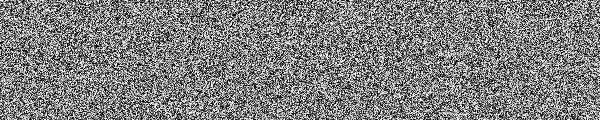

In [118]:
noise = np.random.rand(120,600) # matrice 120x600 à valeurs aléatoires uniformes sur [0,1[
view(noise) # affichage de la matrice sous la forme d'une image monochrome (niveaux de gris)

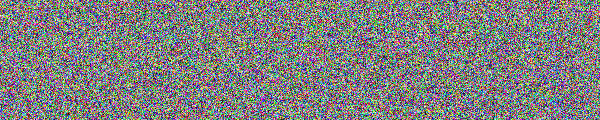

In [119]:
noiseRGB = np.random.rand(120,600,3) # idem pour une matrice 120x600x3
view(noiseRGB) # affichage de la matrice sous la forme d'une image polychrome (couleurs RGB)

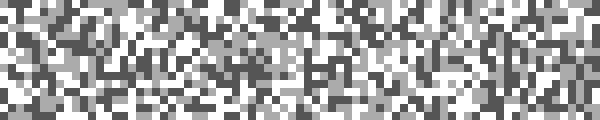

In [120]:
tiles = np.random.choice((1,2,3), (15,75)) # matrice 15x75 à valeurs aléatoire dans {1,2,3}
tiles = tiles.repeat(8, axis=0).repeat(8, axis=1) # duplication de chaque valeur sur un carré 8x8
view(tiles) # affichage de la matrice sous la forme d'une image monochrome (3 niveaux de gris)

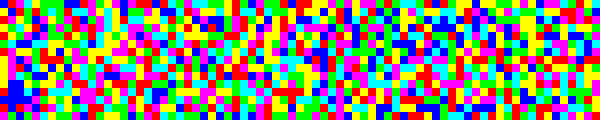

In [121]:
colors = np.array([(1,0,0),(0,1,0),(0,0,1),(0,1,1),(1,0,1),(1,1,0)]) # palette de 6 couleurs R/G/B/C/M/Y
tilesRGB = colors[np.random.randint(6, size=(15,75))] # matrice 15x75 à valeurs aléatoire dans 'colors'
tilesRGB = tilesRGB.repeat(8, axis=0).repeat(8, axis=1) # duplication de chaque valeur sur un carré 8x8
view(tilesRGB) # affichage de la matrice sous la forme d'une image polychrome (6 couleurs uniques)

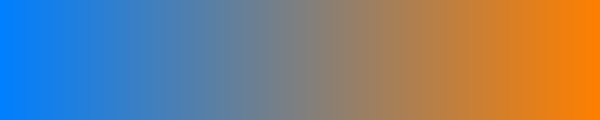

In [122]:
# la fonction 'linspace' permet de créer facilement des dégradés linéaires horizontaux ou verticaux
R, G, B = np.linspace(0,1,600), np.linspace(0.5,0.5,600), np.linspace(1,0,600) # 3 vecteurs de taille 600
gradient = np.dstack((R,G,B)).repeat(120, axis=0) # empilement des 3 vecteurs + duplication sur 120 lignes
view(gradient) # affichage de la matrice sous la forme d'une image polychrome (couleurs RGB)

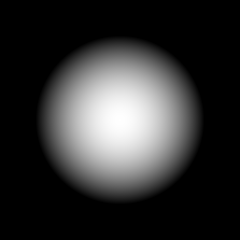

In [123]:
# la fonction 'meshgrid' permet d'associer un système de coordonnées différent des indices matriciels
# ici, les coordonnées x et y varient de -2 à 2, avec le point (0,0) placé au centre de l'image
t = np.linspace(-2,2,240); x, y = np.meshgrid(t,t) # x et y varient linéairement dans l'intervale [-2,2]
ball = 2 - x*x - y*y # fonction décroissante proportionnelle au carré de la distance au centre
view(ball) # affichage de la matrice sous la forme d'une image monochrome (niveaux de gris)

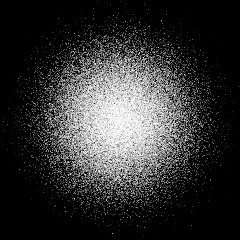

In [124]:
# on rajoute une perturbation aléatoire à distribution normale aux coordonnées x et y
x += np.random.normal(0, 0.25, (240,240)); y += np.random.normal(0, 0.25, (240,240))
jitter = 2 - x*x - y*y # même fonction que précédemment, mais calculée sur les coordonnées perturbées
view(jitter) # affichage de la matrice sous la forme d'une image monochrome (niveaux de gris)

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#06D; text-align:right">● ● ● </div>